In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from matplotlib_venn import venn3
import attila_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Single cell vs bulk tissue RNA-seq

[Mathys et al 2019, Nature](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6865822/) write:
> a rank permutation test (Methods) revealed that bulk data are dominated by expression changes observed at the single-cell level in excitatory neurons and oligodendrocytes (Fig. 1f).

Importing DEGs discovered by [Lin et al 2018, Neuron](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6023751/)

In [2]:
def read_DEip(celltype='Neuron', dirpath='../../results/2021-12-08-apoe-de-genes-tunahan/'):
    fpath = dirpath + celltype + '-apoe-de'
    with open(fpath, 'r') as f:
        genes = f.readlines()
    genes = [s.strip() for s in genes]
    return(genes)

DEip = {'Lin 2018 ' + celltype: read_DEip(celltype) for celltype in ['Neuron', 'Astrocyte', 'Microglia-like']}

Importing DEGs discovered by [Mathys et al 2019, Nature](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6865822/)

In [3]:
def read_DEsc(celltype='Ex', early=True, dirpath='../../results/2022-01-31-single-cell-de-genes/'):
    fpath = dirpath + 'single-cell-' + celltype + '-de'
    fpath += '-early' if early else ''
    with open(fpath, 'r') as f:
        genes = f.readlines()
    genes = [s.strip() for s in genes]
    return(genes)

DEsce = {'Mathys 2019 ' + celltype + ' early': read_DEsc(celltype, early=True) for celltype in ['Ex', 'In', 'Ast', 'Oli', 'Opc', 'Mic']}
DEsc = {'Mathys 2019 ' + celltype: read_DEsc(celltype, early=False) for celltype in ['Ex', 'In', 'Ast', 'Oli', 'Opc', 'Mic']}

In [4]:
def read_DEap(genotype='apoe3-apoe3', dirpath='../../results/2021-11-28-ad-de-genes-apoe/'):
    fpath = dirpath + 'ad-de-genes-' + genotype
    with open(fpath, 'r') as f:
        genes = f.readlines()
    genes = [s.strip() for s in genes]
    return(genes)

DEap = {'Taubes 2021 ' + celltype: read_DEap(celltype) for celltype in ['apoe3-apoe3', 'apoe4-apoe4']}

In [5]:
DE = dict()
DE.update(DEip)
DE.update(DEsce)
DE.update(DEsc)
DE.update(DEap)
DE.keys()

dict_keys(['Lin 2018 Neuron', 'Lin 2018 Astrocyte', 'Lin 2018 Microglia-like', 'Mathys 2019 Ex early', 'Mathys 2019 In early', 'Mathys 2019 Ast early', 'Mathys 2019 Oli early', 'Mathys 2019 Opc early', 'Mathys 2019 Mic early', 'Mathys 2019 Ex', 'Mathys 2019 In', 'Mathys 2019 Ast', 'Mathys 2019 Oli', 'Mathys 2019 Opc', 'Mathys 2019 Mic', 'Taubes 2021 apoe3-apoe3', 'Taubes 2021 apoe4-apoe4'])

['named-figure/de-gene-counts.png', 'named-figure/de-gene-counts.pdf']

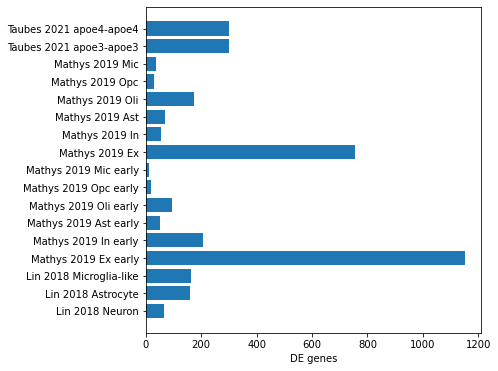

In [6]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.barh(np.arange(len(DE)), [len(v) for v in DE.values()])
ax.set_yticks(np.arange(len(DE)))
ax.set_yticklabels(DE.keys())
ax.set_xlabel('DE genes')
attila_utils.savefig(fig, 'de-gene-counts')

In [7]:
def count_intersection(A='Mathys 2019 Ex', B='Lin 2018 Astrocyte', jaccard=False, DE=DE):
    isect = set(DE[A]).intersection(set(DE[B]))
    count = len(isect)
    if not jaccard:
        return(count)
    jaccard = count / len(set(DE[A]).union(set(DE[B])))
    return(jaccard)

count_intersection()

5

In [8]:
isec = np.array([[count_intersection(A, B, jaccard=False) for A in DE.keys()] for B in DE.keys()])
isec_df = pd.DataFrame(isec, index=DE.keys(), columns=DE.keys())
isec_df

,Lin 2018 Neuron,Lin 2018 Astrocyte,Lin 2018 Microglia-like,Mathys 2019 Ex early,Mathys 2019 In early,Mathys 2019 Ast early,Mathys 2019 Oli early,Mathys 2019 Opc early,Mathys 2019 Mic early,Mathys 2019 Ex,Mathys 2019 In,Mathys 2019 Ast,Mathys 2019 Oli,Mathys 2019 Opc,Mathys 2019 Mic,Taubes 2021 apoe3-apoe3,Taubes 2021 apoe4-apoe4
Lin 2018 Neuron,64,6,6,5,1,0,0,0,0,3,0,1,0,0,0,1,0
Lin 2018 Astrocyte,6,159,8,2,2,0,1,0,0,5,0,2,0,0,2,0,2
Lin 2018 Microglia-like,6,8,162,10,1,0,2,0,0,6,1,2,5,1,1,1,3
Mathys 2019 Ex early,5,2,10,1151,173,19,23,4,0,526,34,12,25,7,2,48,49
Mathys 2019 In early,1,2,1,173,207,6,16,2,0,92,37,2,12,1,0,22,19
Mathys 2019 Ast early,0,0,0,19,6,51,4,2,2,13,0,29,2,1,1,5,2
Mathys 2019 Oli early,0,1,2,23,16,4,96,3,0,15,4,5,57,3,1,13,4
Mathys 2019 Opc early,0,0,0,4,2,2,3,18,0,4,0,2,1,8,0,1,1
Mathys 2019 Mic early,0,0,0,0,0,2,0,0,10,0,0,0,0,0,8,0,0
Mathys 2019 Ex,3,5,6,526,92,13,15,4,0,756,30,10,20,5,2,32,33


['named-figure/isec-heatmap.png', 'named-figure/isec-heatmap.pdf']

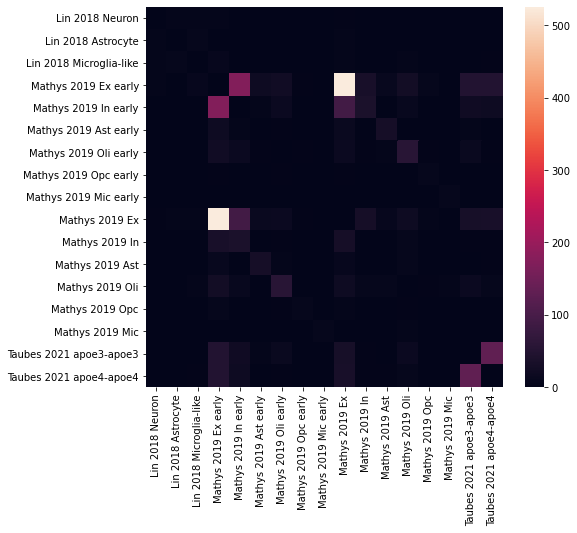

In [9]:
fig, ax = plt.subplots(figsize=(8, 7))
np.fill_diagonal(isec, 0)
sns.heatmap(isec, ax=ax, vmin=0, vmax=isec.max(), xticklabels=DE.keys(), yticklabels=DE.keys())
attila_utils.savefig(fig, 'isec-heatmap')

Calculate Jaccard index $J$ for a pair of DE gene sets $A, B$:
\begin{equation}
J = \frac{|A \cap B|}{|A \cup B|}
\end{equation}

In [10]:
jaccard = np.array([[count_intersection(A, B, jaccard=True) for A in DE.keys()] for B in DE.keys()])
jaccard_df = pd.DataFrame(jaccard, index=DE.keys(), columns=DE.keys())
#jaccard_df

['named-figure/jaccard-heatmap.png', 'named-figure/jaccard-heatmap.pdf']

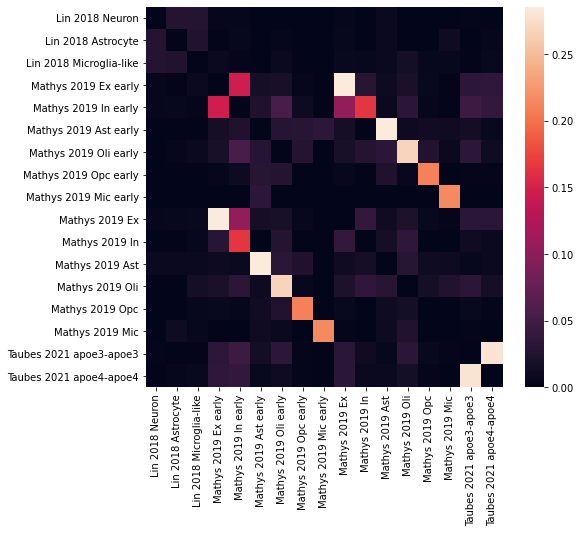

In [11]:
fig, ax = plt.subplots(figsize=(8, 7))
np.fill_diagonal(jaccard, 0)
sns.heatmap(jaccard, ax=ax, vmin=0, vmax=jaccard.max() * 0.75, xticklabels=DE.keys(), yticklabels=DE.keys())
attila_utils.savefig(fig, 'jaccard-heatmap')

## Genes supported by $k$ studies

In [12]:
l = list(set(itertools.chain(*[v for v in DE.values()])))
l.sort()
membership = pd.concat([pd.DataFrame(1, index=v, columns=[k]).reindex(l).fillna(0).astype(bool) for k, v in DE.items()], axis=1)
membership['frequency'] = membership.apply(sum, axis=1)
membership = membership.sort_values('frequency', ascending=False)
frequency = membership.value_counts()

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


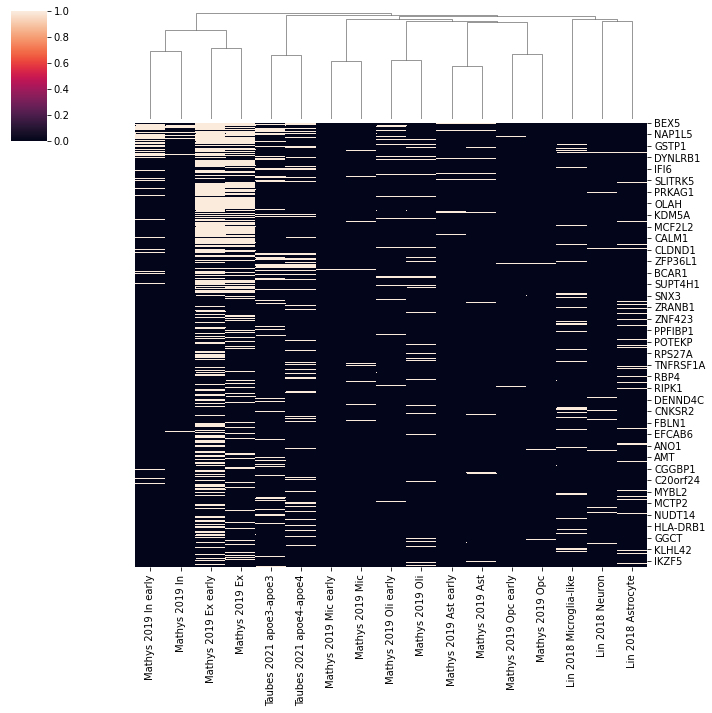

In [13]:
sns.clustermap(membership.iloc[:, :-1].astype(np.int8), row_cluster=False, metric='correlation')

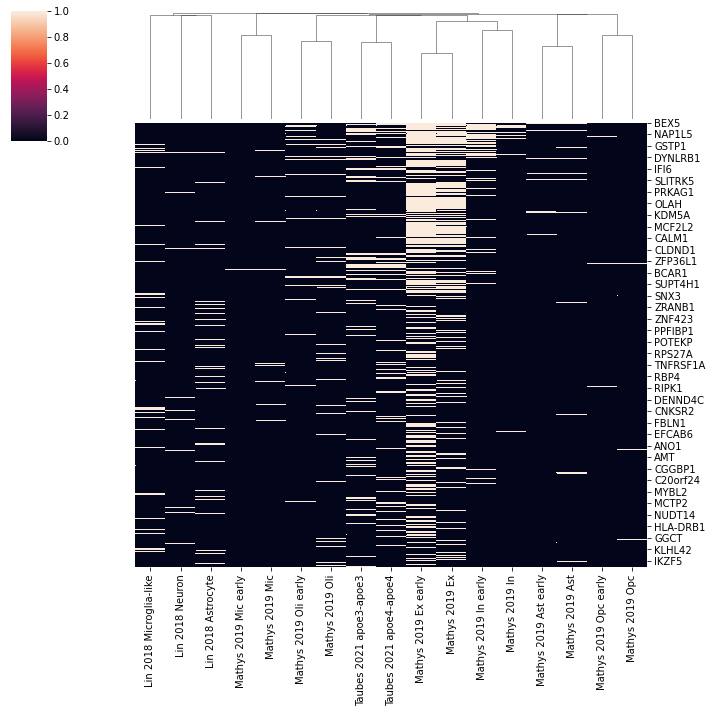

In [14]:
sns.clustermap(membership.iloc[:, :-1].astype(np.int8), row_cluster=False, metric='jaccard')

In [15]:
#membership.iloc[:13]
def style_False(v, props=''):
    return props if not v else None

#membership.loc[membership.frequency >= 5].style.applymap(style_False, props='color:lightgray;')
pd.concat([membership.loc[membership.frequency >= 5, : 'Taubes 2021 apoe4-apoe4'].applymap(lambda x: '+' if x else ''), membership.loc[membership.frequency >= 5, ['frequency']]], axis=1)

,Lin 2018 Neuron,Lin 2018 Astrocyte,Lin 2018 Microglia-like,Mathys 2019 Ex early,Mathys 2019 In early,Mathys 2019 Ast early,Mathys 2019 Oli early,Mathys 2019 Opc early,Mathys 2019 Mic early,Mathys 2019 Ex,Mathys 2019 In,Mathys 2019 Ast,Mathys 2019 Oli,Mathys 2019 Opc,Mathys 2019 Mic,Taubes 2021 apoe3-apoe3,Taubes 2021 apoe4-apoe4,frequency
BEX5,,,,+,+,,,,,+,+,,+,,,+,+,7
RAB3A,,,,+,+,,+,,,+,,,+,,,+,,6
MLLT11,,,,+,+,,,,,+,+,,+,,,+,,6
STMN2,,,,+,+,,+,,,,+,,+,,,+,,6
TMBIM6,,,,+,,,+,,,+,,+,+,,+,,,6
RASGEF1B,,,,+,+,,+,,,+,,,+,+,,,,6
GFAP,,,,+,,+,,,,+,,+,,,,,+,5
PLEC,,,,+,,+,,,,+,,+,,,,,+,5
SPARCL1,,,,+,+,,+,,,,,,+,,,,+,5
SNCG,,,,+,+,,+,,,+,,,+,,,,,5


In [16]:
#membership.loc[membership.frequency == 4].style.applymap(style_False, props='color:lightgray;')
#membership.loc[membership.frequency == 4].applymap(lambda x: '+' if x else '').style.applymap(lambda x: x)
pd.set_option('display.max_rows', None)
pd.concat([membership.loc[membership.frequency == 4, : 'Taubes 2021 apoe4-apoe4'].applymap(lambda x: '+' if x else ''), membership.loc[membership.frequency == 4, ['frequency']]], axis=1)

,Lin 2018 Neuron,Lin 2018 Astrocyte,Lin 2018 Microglia-like,Mathys 2019 Ex early,Mathys 2019 In early,Mathys 2019 Ast early,Mathys 2019 Oli early,Mathys 2019 Opc early,Mathys 2019 Mic early,Mathys 2019 Ex,Mathys 2019 In,Mathys 2019 Ast,Mathys 2019 Oli,Mathys 2019 Opc,Mathys 2019 Mic,Taubes 2021 apoe3-apoe3,Taubes 2021 apoe4-apoe4,frequency
PPA1,,,,+,+,,,,,,+,,+,,,,,4
NDUFA4,,,,+,+,,+,,,,+,,,,,,,4
MGST3,,,,+,+,,,,,+,+,,,,,,,4
NGFRAP1,,,,+,+,,,,,+,+,,,,,,,4
UBC,,,,+,+,,,+,,+,,,,,,,,4
GPM6A,,,,,,,+,,,,,,+,,,+,+,4
FBXO2,,,,+,+,,,,,+,+,,,,,,,4
UQCRH,,,,+,+,,,,,+,,,,,,,+,4
UQCR10,,,,+,+,+,,,,+,,,,,,,,4
GPRC5B,,,,,,+,+,,,,,+,+,,,,,4


In [17]:
%connect_info

{
  "shell_port": 51778,
  "iopub_port": 51779,
  "stdin_port": 51780,
  "control_port": 51782,
  "hb_port": 51781,
  "ip": "127.0.0.1",
  "key": "92066479-1224b027e91f05c7e9d6c68d",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-3aae7431-dc26-4c20-9140-980ed0b19115.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
